In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv


In [28]:
import pandas as pd

df = pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")

In [29]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [30]:
 df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

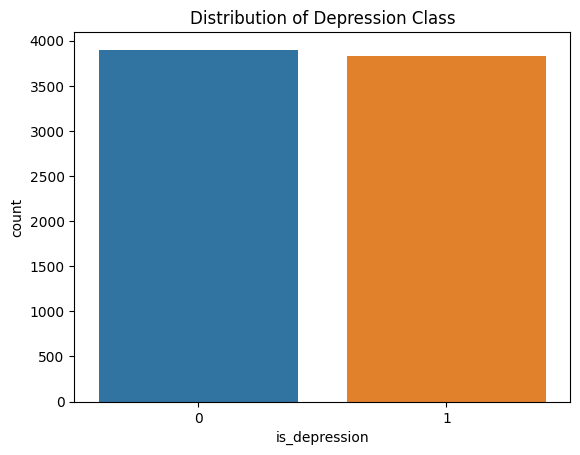

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


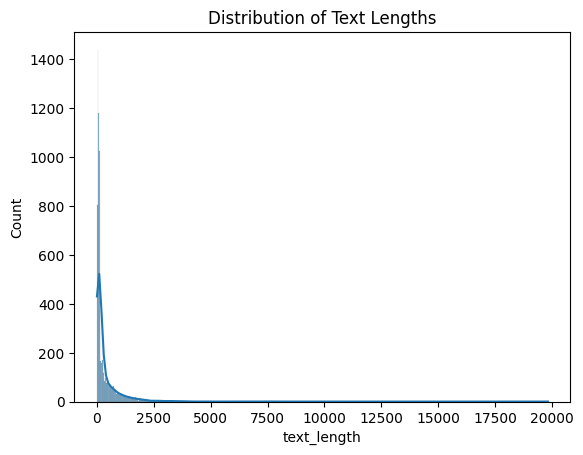

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='is_depression', data=df)
plt.title('Distribution of Depression Class')
plt.show()

df['text_length'] = df['clean_text'].apply(len)
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

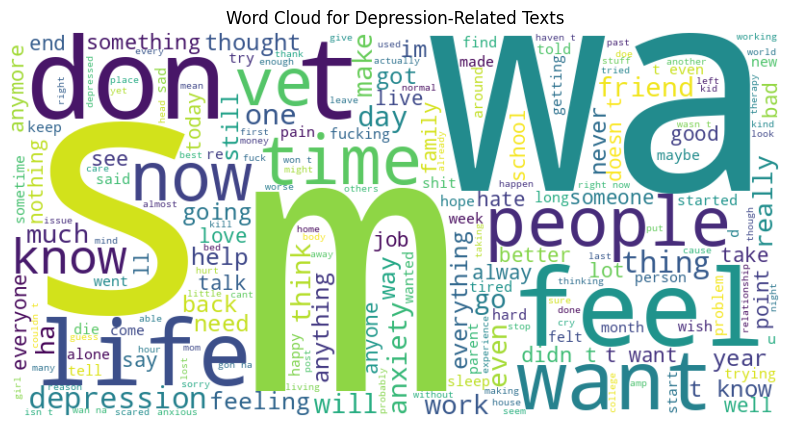

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depression-Related Texts')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       780
           1       0.97      0.94      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547


Precision (macro): 0.9578
Recall (macro):    0.9572
F1 Score (macro):  0.9573


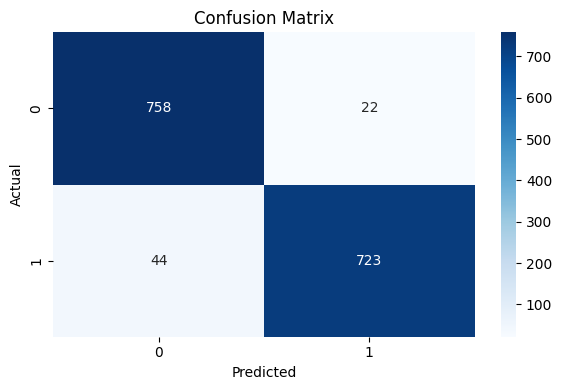

In [40]:
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(preprocess_text)

X = df['clean_text']
y = df['is_depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ('svm', SVC(kernel='linear', class_weight='balanced', probability=True))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nPrecision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1 Score (macro):  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.95      0.84      0.89       780
           1       0.86      0.96      0.90       767

    accuracy                           0.90      1547
   macro avg       0.90      0.90      0.90      1547
weighted avg       0.90      0.90      0.90      1547


Precision (macro): 0.9043
Recall (macro):    0.8996
F1 Score (macro):  0.8989


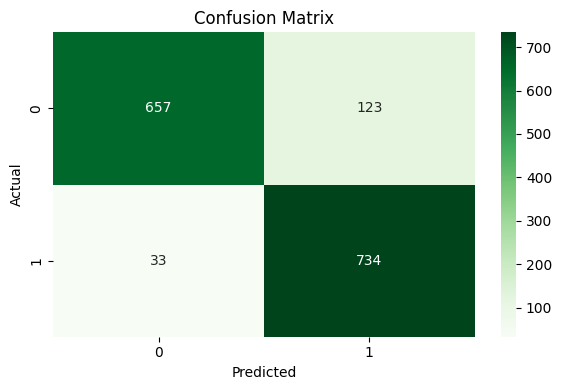

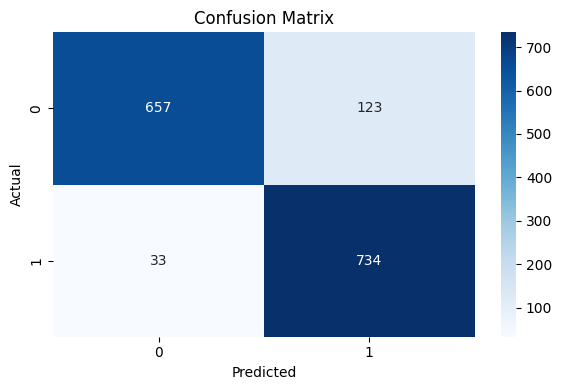

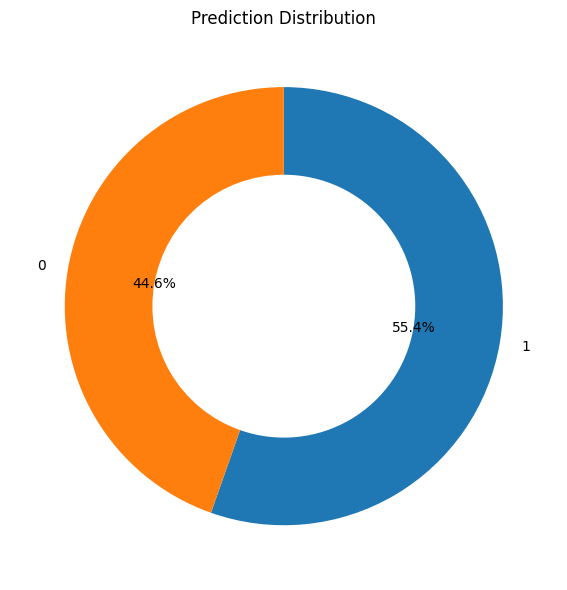

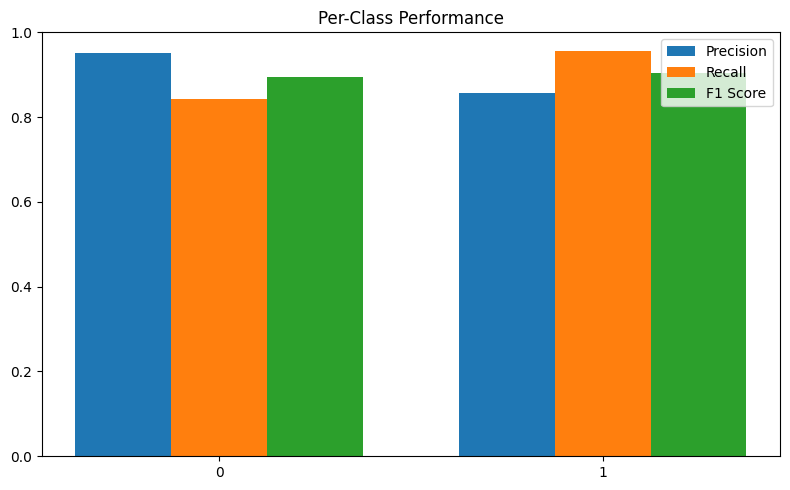

In [43]:
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(preprocess_text)

X = df['clean_text']
y = df['is_depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ('nb', MultinomialNB())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nPrecision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1 Score (macro):  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


labels = np.unique(y_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Donut Chart of Prediction Distribution
pred_counts = pd.Series(y_pred).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pred_counts, labels=pred_counts.index, startangle=90, counterclock=False, 
        wedgeprops=dict(width=0.4), autopct='%1.1f%%')
plt.title('Prediction Distribution')
plt.tight_layout()
plt.show()

# Precision, Recall, F1 Score Bar Chart
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.title('Per-Class Performance')
plt.legend()
plt.tight_layout()
plt.show()



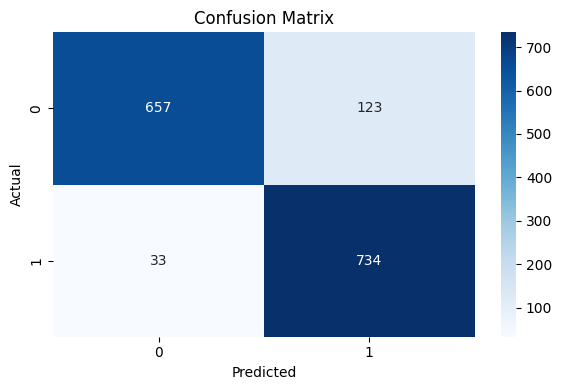

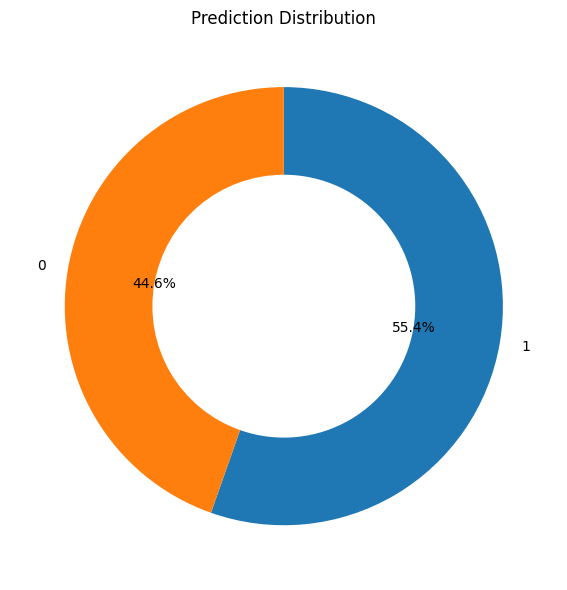

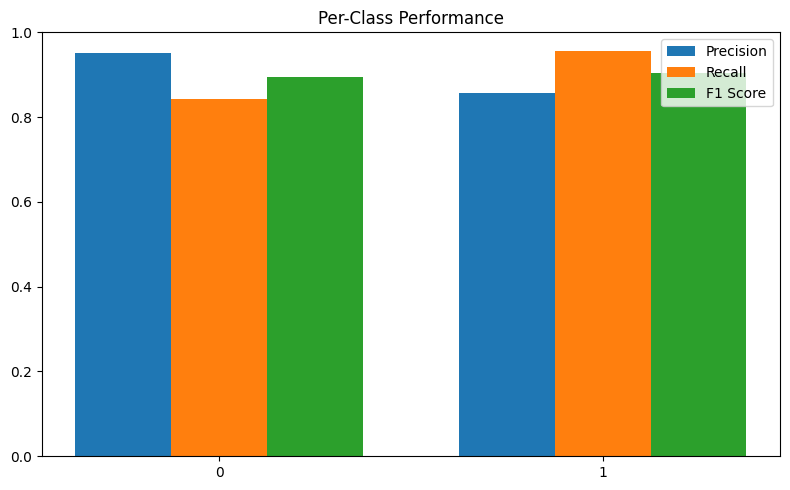

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Replace with your actual class labels if needed
labels = np.unique(y_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Donut Chart of Prediction Distribution
pred_counts = pd.Series(y_pred).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pred_counts, labels=pred_counts.index, startangle=90, counterclock=False, 
        wedgeprops=dict(width=0.4), autopct='%1.1f%%')
plt.title('Prediction Distribution')
plt.tight_layout()
plt.show()

# Precision, Recall, F1 Score Bar Chart
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.title('Per-Class Performance')
plt.legend()
plt.tight_layout()
plt.show()
